#  Imports and Read in One Map

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

In [2]:
from projections import transform_map

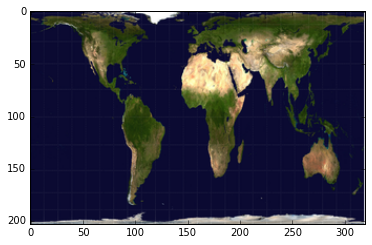

In [3]:
map1 = misc.imread('/Users/pfoley/map_projections/input_images/Gall-peters_smallest.png')
map2 = misc.imread('/Users/pfoley/map_projections/input_images/plate_carre_1.jpg')
plt.imshow(map1)

#  Example Transformation

In [4]:
from projections import rotationFromXYZ

Oops - this input image is actually a gall peters projection.  We want to output using plate carre.

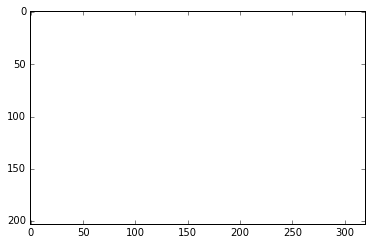

In [5]:
map1b = transform_map(map1, rotationFromXYZ(0.0, 0.0, 0.0), 
		     in_projection='gallpeters', out_projection='gallpeters')

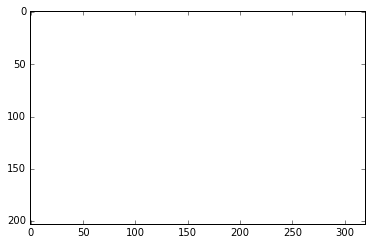

In [6]:
map4 = transform_map(map1, rotationFromXYZ(0.0, 0.0, 0.0), 
		     in_projection='gallpeters', out_projection='platecarre')

Uh oh, I have a bug.  

Let's see if the bug is localized to gall peters code.  

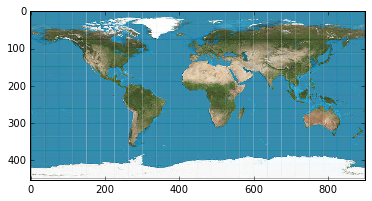

In [5]:
plt.imshow(map2)

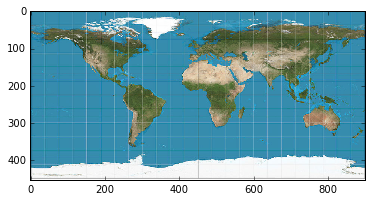

In [6]:
map2b = transform_map(map2, rotationFromXYZ(0.0, 0.0, 0.0), 
        in_projection='platecarre', out_projection='platecarre', debug=False)

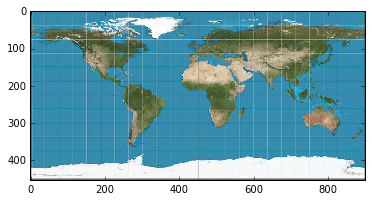

In [9]:
map2c = transform_map(map2b, rotationFromXYZ(0.0, 0.0, 0.0), 
        in_projection='platecarre', out_projection='platecarre', debug=False)

Great!  it still looks OK.  But there's something wrong with my gall peters code. 

##  New Rotation Code

I just finished some code to get rotations to place two locations as front and center.  Let's try it out.

First let's do SF to Melbourne.

37.7749° N, 122.4194° W
37.8136° S, 144.9631° E

In [26]:
san_francisco = (-122.4194, 37.7749)
melbourne = (144.9631, -37.8136)
seoul = (126.9780, 37.5665)

In [27]:
san_francisco = tuple([d * np.pi / 180.0 for d in san_francisco])
melbourne = tuple([d * np.pi / 180.0 for d in melbourne])
seoul = tuple([d * np.pi / 180.0 for d in seoul])

In [28]:
san_francisco


(-2.136621598315946, 0.659296379611606)

In [29]:
seoul

(2.2161841775973596, 0.6556591134504498)

In [30]:
from projections import rotationFromTwoLocations

In [31]:
san_francisco

(-2.136621598315946, 0.659296379611606)

In [32]:
melbourne

(2.5300833888977916, -0.6599718220321278)

In [33]:
seoul

(2.2161841775973596, 0.6556591134504498)

In [34]:
test_loc = (0.0, 0.659296379611606)

In [35]:
sf_to_melbourne = rotationFromTwoLocations(melbourne, san_francisco)
melbourne_to_sf = rotationFromTwoLocations(san_francisco, melbourne)
sf_to_seoul = rotationFromTwoLocations(seoul, san_francisco)
seoul_to_sf = rotationFromTwoLocations(san_francisco, seoul)
sf_to_test = rotationFromTwoLocations(test_loc, san_francisco)
test_to_sf = rotationFromTwoLocations(san_francisco, test_loc)

In [25]:
from projections import spatialCoordinatesFromLongitudeAndLatitude

In [26]:
sfvec = spatialCoordinatesFromLongitudeAndLatitude(*san_francisco)
seoulvec = spatialCoordinatesFromLongitudeAndLatitude(*seoul)
melbournevec = spatialCoordinatesFromLongitudeAndLatitude(*melbourne)

In [27]:
sfvec = np.array(sfvec) 
seoulvec = np.array(seoulvec) 

sfvec = sfvec / np.linalg.norm(sfvec)
seoul = seoul / np.linalg.norm(seoul)

In [28]:
middle = sfvec + seoulvec
middle = middle / np.linalg.norm(middle)

crossprod = np.cross(sfvec, seoulvec)
crossvec = crossprod / np.linalg.norm(crossprod)

thirdvec = np.cross(crossvec, middle)
thirdvec = thirdvec / np.linalg.norm(thirdvec)

diffvec = sfvec - seoulvec
diffvec = diffvec / np.linalg.norm(diffvec)

In [29]:
print sfvec
print seoulvec
print middle
print crossvec
print thirdvec
print diffvec

[-0.423756   -0.66723314  0.61256085]
[-0.47678332  0.63321856  0.60968182]
[-0.59302437 -0.02239933  0.80487289]
[-0.80415308 -0.03410401 -0.59344312]
[-0.04074212  0.99916725 -0.00221202]
[ 0.04074212 -0.99916725  0.00221202]


In [30]:
from projections import longitudeAndLatitudeFromSpatialCoordinates
middlelonglat = longitudeAndLatitudeFromSpatialCoordinates(*middle)
print middlelonglat

(-3.1038392604268346, 0.93546124678832776)


In [31]:
print np.array(middlelonglat) * (180.0 / np.pi)

[-177.83688991   53.59798134]


Now let's use a large plate carre image.

In [32]:
!ls /Users/pfoley/map_projections/input_images/

Gall-peters_Largest.png
Gall-peters_sizeTwo.png
Gall-peters_smallest.png
Whole_world_-_land_and_oceans_original.jpg
Whole_world_-_land_and_oceans_original.png
Whole_world_-_land_and_oceans_original_2.jpg
bigWorld.jpg
earth-huge.png
earth_lights_lrg_plate_carre.jpg
large_eath.jpg
miller_graphical_large.jpg
nasa_earth_decembger_5400x2700.jpg
nasa_world_july_5400x2700.jpg
new3.jpg
peters-political.png
peters-political2.jpg
peters-political2.png
peters-sat.jpg
peters-sat.png
place_carre_tissot.png
plate_carre_1.jpg
sat_earth_large_plate_carre.jpg
small_sat_peters.jpg
untitled folder
veryLarge_japanese.png
very_large_upsideDown.jpg


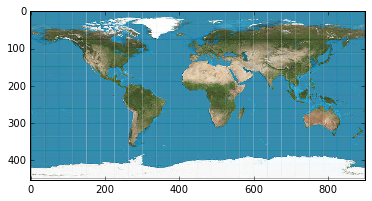

In [24]:
map_large = misc.imread('/Users/pfoley/map_projections/input_images/plate_carre_1.jpg')
plt.imshow(map_large)

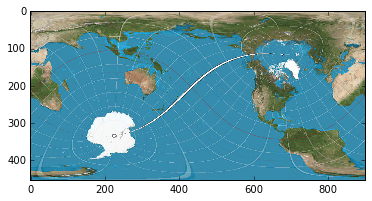

In [40]:
large_sf_to_melbourne = transform_map(map2,
                     sf_to_melbourne,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     debug=False)

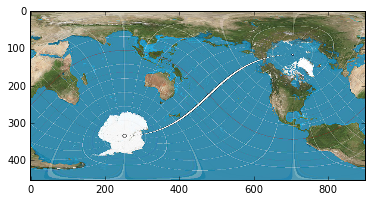

In [41]:
large_sf_to_melbourne = transform_map(map2,
                     sf_to_melbourne.T,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     debug=False)

Quick check. 

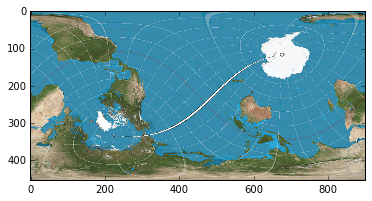

In [42]:
map3 = transform_map(map2,
                     melbourne_to_sf,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     debug=False)

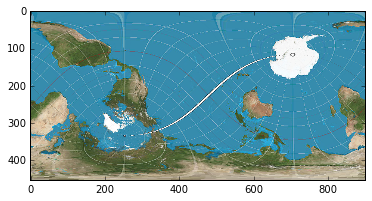

In [43]:
map3 = transform_map(map2,
                     melbourne_to_sf.T,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     debug=False)

In [30]:
seoul

(2.2161841775973596, 0.6556591134504498)

In [31]:
san_francisco

(-2.136621598315946, 0.659296379611606)

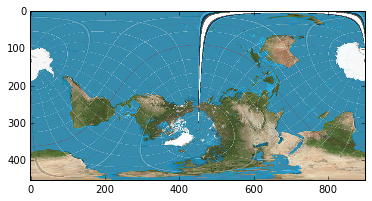

In [44]:
map3 = transform_map(map2,
                     rotationFromTwoLocations(san_francisco, seoul),
                     in_projection='platecarre',
                     out_projection='platecarre',
                     debug=False)

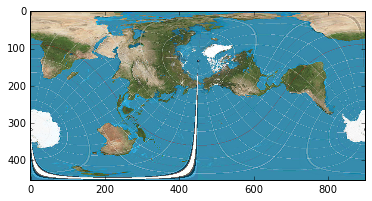

In [45]:
map3 = transform_map(map2,
                     rotationFromTwoLocations(seoul, san_francisco),
                     in_projection='platecarre',
                     out_projection='platecarre',
                     debug=False)

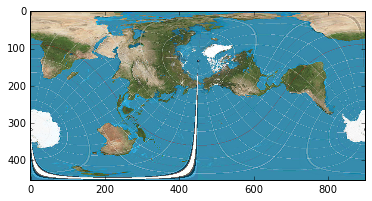

In [47]:
map3 = transform_map(map2,
                     rotationFromTwoLocations(seoul, san_francisco).T.T,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     debug=False)

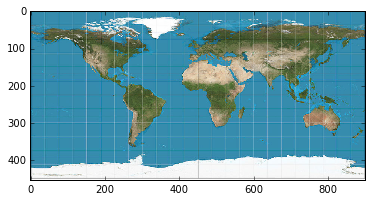

In [49]:
map3 = transform_map(map2,
                     rotationFromTwoLocations((50.0, 0.0), (-50.0, 0.0)),
                     in_projection='platecarre',
                     out_projection='platecarre',
                     debug=False)

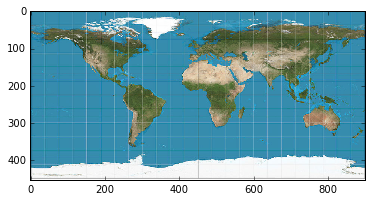

In [50]:
map3 = transform_map(map2,
                     rotationFromTwoLocations((50.0, 0.0), (-50.0, 0.0)).T,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     debug=False)

#  Check Speed

In [27]:
%%timeit
map3 = transform_map(map2,
                     sf_to_melbourne,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     display=False,
                     debug=False)

10 loops, best of 3: 75.2 ms per loop


In [28]:
%%timeit
map3 = transform_map(map2,
                     melbourne_to_sf,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     display=False,
                     debug=False)

10 loops, best of 3: 74.9 ms per loop


10 loops, best of 3: 86.7 ms per loop


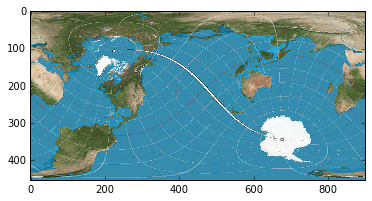

In [29]:
%%timeit
map3 = transform_map(map2,
                     sf_to_melbourne,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     debug=False)

Looks like it's about 75 milliseconds. 

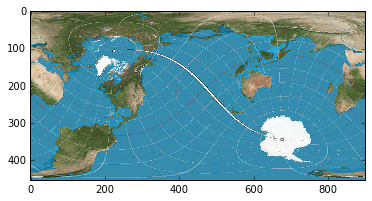

In [31]:
map3 = transform_map(map2,
                     sf_to_melbourne,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     debug=False)

Let's speed test after getting rid of that artifact.

In [32]:
july_sat = misc.imread('/Users/pfoley/map_projections/input_images/nasa_world_july_5400x2700.jpg')

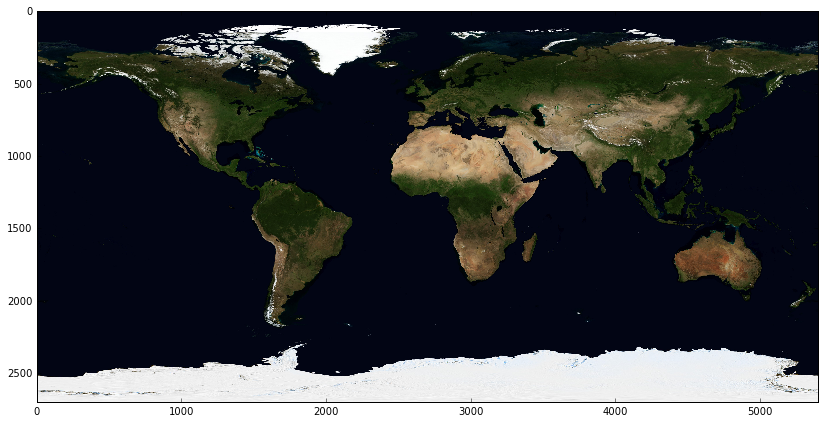

In [40]:
plt.figure(figsize=(14,10))
plt.imshow(july_sat)

In [44]:
%%timeit
map3 = transform_map(july_sat,
                     sf_to_melbourne,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     display=False,
                     debug=False)

1 loop, best of 3: 3.92 s per loop


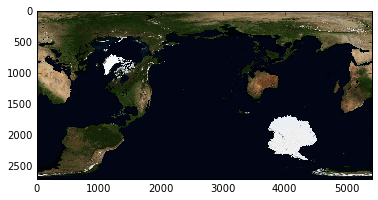

In [45]:
map_timed = transform_map(july_sat,
                     sf_to_melbourne,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     debug=False)

In [46]:
misc.imsave('check_resolution_4seconds.jpg', map_timed)

In [47]:
map_timed.shape

(2700, 5400, 3)

In [48]:
map_timed.dtype

dtype('uint8')

In [50]:
%%timeit
test = np.zeros(dtype = 'uint8', shape = (2700, 5400, 3))

100 loops, best of 3: 8.96 ms per loop


In [52]:
from copy import deepcopy

In [53]:
%%timeit
test = deepcopy(map_timed)

100 loops, best of 3: 11.1 ms per loop


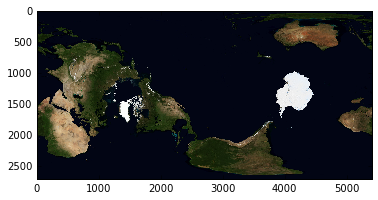

In [61]:
map_sf2seoul = transform_map(july_sat,
                     seoul_to_sf.T,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     debug=False)

# Debug

It looks like I can't get SF to Seoul for some reason.  Let's debug.  

First - is my basic longitude / latitude part from the very start OK?  Or am I off by some pi or something?

In [8]:
map2.shape

(453, 900, 3)

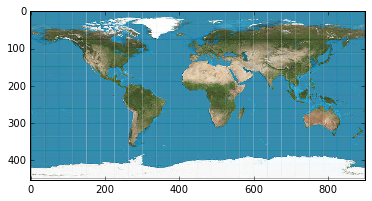

In [9]:
plt.imshow(map2)

OK, let's try my latitude longitude function for an x of about 450, and a y of around 100.  should be near the UK.

In [10]:
from projections import longitudeAndLatitudeFromPCPixel

In [11]:
myloc = longitudeAndLatitudeFromPCPixel(450, 100, (900, 453))

In [12]:
np.array(list(myloc)) * (180.0 / np.pi)

array([  0.        ,  50.26490066])

It looks like I am flipping things.

OK great I fixed it!  Now I'm not fipping things.

###  XYZ Debug

Now, before working on rotations, let me check if I have the right x, y, and z.

In [13]:
from projections import spatialCoordinatesFromLongitudeAndLatitude

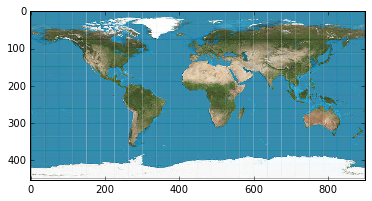

In [14]:
plt.imshow(map2)

In [16]:
spatialCoordinatesFromLongitudeAndLatitude(
    *longitudeAndLatitudeFromPCPixel(
        450, 100, (900, 453)))

(0.63923903103344193, 0.0, 0.76900810217020876)

OK, cool, that place in France looks like mostly x and some z, but then no y, which is great.  Now let me try to get a vector that's mostly y.

In [17]:
spatialCoordinatesFromLongitudeAndLatitude(
    *longitudeAndLatitudeFromPCPixel(
        725, 250, (900, 453)))

(-0.33748804546167965, 0.92724078424183998, -0.16225395899340278)

Now let me rotate it a bit around X and then a bit around Z.

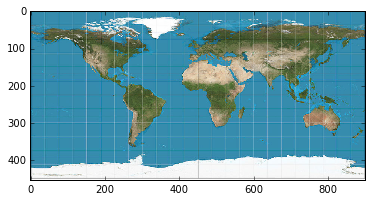

In [18]:
map2b = transform_map(map2, rotationFromXYZ(0.0, 0.0, 0.0), 
        in_projection='platecarre', out_projection='platecarre', debug=False)

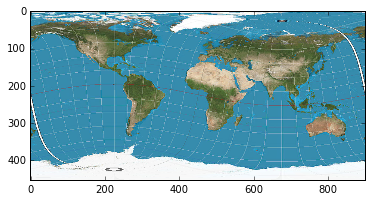

In [20]:
map2b = transform_map(map2, rotationFromXYZ(0.2, 0.0, 0.0), 
        in_projection='platecarre', out_projection='platecarre', debug=False)

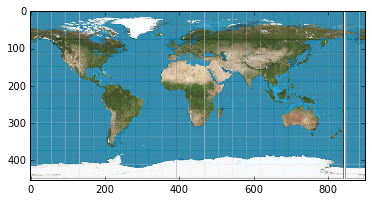

In [22]:
map2b = transform_map(map2, rotationFromXYZ(0.0, 0.0, 0.4), 
        in_projection='platecarre', out_projection='platecarre', debug=False)

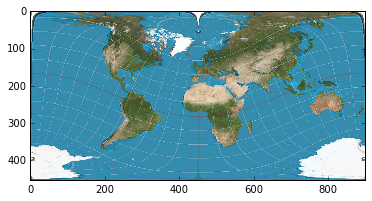

In [25]:
map2b = transform_map(map2, rotationFromXYZ(0.0, -0.4, 0.0), 
        in_projection='platecarre', out_projection='platecarre', debug=False)

OK, all looks good.  Now let me try to do a rotation from place to place. 